# Concevez une application au service de la santé publique 01 #

In [1]:
# Change le répertoire de travail courant
import os
os.chdir("C:\\Users\\Julien Gremillot\\OneDrive\\Documents\\OpenClassrooms\\Jupyter")
os.getcwd()

'C:\\Users\\Julien Gremillot\\OneDrive\\Documents\\OpenClassrooms\\Jupyter'

In [2]:
# Téléchargement des données !! ATTENTION 4.2Go !!
#import requests
#url = "https://static.openfoodfacts.org/data/en.openfoodfacts.org.products.csv"
#downloaded_file = requests.get(url, allow_redirects=True)
#open('en.openfoodfacts.org.products.csv', 'wb').write(downloaded_file.content)

In [3]:
# Lecture du fichier CSV... surveiller la RAM !
import pandas as pd
data = pd.read_csv("en.openfoodfacts.org.products.csv", sep='\t') # séparateur = tabulation
print(data.shape)

C:\anaconda\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (0,8,13,27,28,29,31,38,52,55,64) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


(1888730, 186)


In [4]:
# Nombre total de valeurs manquantes pour chaque caractéristique
percent_missing = data.isnull().sum() * 100 / len(data)
missing_values = pd.DataFrame({'pourcentage_manquant': percent_missing})
missing_values.sort_values('pourcentage_manquant', inplace=True)

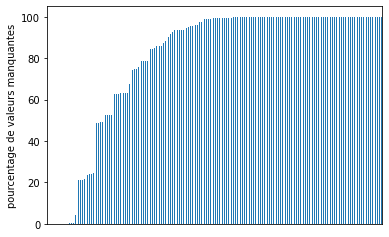

In [5]:
# Diagramme en tuyaux d'orgues
import matplotlib.pyplot as plt
ax1 = missing_values["pourcentage_manquant"].plot(kind='bar')
ax1.xaxis.set_visible(False)
plt.ylabel("pourcentage de valeurs manquantes")
plt.show()

In [6]:
print("Nombre de colonnes :", data.shape[1])
print("Nombre de colonnes incomplètes à plus de 90% :", 
      len(missing_values[missing_values['pourcentage_manquant'] > 90].index.values))

Nombre de colonnes : 186
Nombre de colonnes incomplètes à plus de 90% : 119


In [7]:
print(missing_values[missing_values['pourcentage_manquant'] > 90].index.values)

['allergens' 'purchase_places' 'energy-kj_100g' 'traces_en' 'traces_tags'
 'manufacturing_places' 'manufacturing_places_tags' 'generic_name'
 'emb_codes' 'emb_codes_tags' 'traces' 'potassium_100g' 'origins'
 'origins_tags' 'origins_en' 'cities_tags' 'first_packaging_code_geo'
 'monounsaturated-fat_100g' 'polyunsaturated-fat_100g'
 'ingredients_that_may_be_from_palm_oil_tags' 'vitamin-pp_100g'
 'vitamin-b1_100g' 'vitamin-b2_100g' 'alcohol_100g' 'vitamin-b6_100g'
 'magnesium_100g' 'ingredients_from_palm_oil_tags' 'phosphorus_100g'
 'vitamin-b12_100g' 'fruits-vegetables-nuts-estimate_100g'
 'carbon-footprint-from-meat-or-fish_100g' 'vitamin-b9_100g' 'zinc_100g'
 'vitamin-d_100g' 'fruits-vegetables-nuts_100g' 'folates_100g'
 'abbreviated_product_name' 'pantothenic-acid_100g' 'cocoa_100g'
 'packaging_text' 'copper_100g' 'manganese_100g' 'polyols_100g'
 '-soluble-fiber_100g' 'vitamin-e_100g' '-insoluble-fiber_100g'
 'selenium_100g' 'iodine_100g' 'omega-3-fat_100g' 'phylloquinone_100g'
 'vita

In [8]:
data.shape

(1888730, 186)

In [9]:
# Suppression des colonnes vides à plus de 90%
for c in missing_values[missing_values['pourcentage_manquant'] > 90].index.values:
    del data[c]

In [10]:
# 1er enregistrement "cleané" au format CSV
#data.to_csv("en.openfoodfacts.org.products.clean01.csv",index=False)
# => reste 67 colonnes - fichier 3.9Go

In [11]:
data.shape

(1888730, 67)

In [12]:
# On supprime également les colonnes qui concernent la base de OpenFoodFacts en elle-même (URLs, timestamps, état données)
for c in data.columns:
    if c in ['url', 'creator', 'created_t', 'created_datetime', 'last_modified_t', 'last_modified_datetime', 
         'abbreviated_product_name', 'generic_name', 'image_url', 'image_small_url', 'image_ingredients_url', 
         'image_ingredients_small_url', 'image_nutrition_url', 'image_nutrition_small_url',
         'states', 'states_tags', 'states_en']:
        del data[c]

In [13]:
# 2e enregistrement "cleané" au format CSV
#data.to_csv("en.openfoodfacts.org.products.clean02.csv",index=False)
#data.shape
# => reste 52 colonnes - fichier 900Mo

In [14]:
# On identifie les colonnes de type "_100g" dont les valeurs ne devraient pas être supérieures à 100
cols_100g = []
for c in data.columns:
    if '_100g' in c and 'footprint' not in c and 'nutrition' not in c and 'energy' not in c and 'ph_100g' != c:
        cols_100g.append(c)
print("on a", len(cols_100g), "colonnes de type '_100g' (sauf types 'footprint', 'nutrition', 'ph' ou 'energy')")

on a 14 colonnes de type '_100g' (sauf types 'footprint', 'nutrition', 'ph' ou 'energy')


In [15]:
print(cols_100g)

['fat_100g', 'saturated-fat_100g', 'trans-fat_100g', 'cholesterol_100g', 'carbohydrates_100g', 'sugars_100g', 'fiber_100g', 'proteins_100g', 'salt_100g', 'sodium_100g', 'vitamin-a_100g', 'vitamin-c_100g', 'calcium_100g', 'iron_100g']


In [16]:
# On supprime toutes les lignes qui comporte une valeur incorrecte dans l'une de ces colonnes
taille_avant = data.shape[0]
for col in cols_100g:
    data.drop(data.loc[data[col] > 100].index, inplace=True)
    data.drop(data.loc[data[col] < 0].index, inplace=True)
print(taille_avant - data.shape[0], "lignes supprimées")

1528 lignes supprimées


In [17]:
# 3e enregistrement "cleané" au format CSV
#data.to_csv("en.openfoodfacts.org.products.clean03.csv", index=False)

In [18]:
# On veut pouvoir compter sur un minimum d'infos nutritionnelles : on supprime les lignes où tous les "_100g" sont à 0
taille_avant = data.shape[0]
data.drop(data.loc[data[cols_100g].sum(axis=1) == 0].index, inplace=True)
print(taille_avant - data.shape[0], "lignes supprimées")

409654 lignes supprimées


In [19]:
#data.to_csv("en.openfoodfacts.org.products.clean04.csv", index=False)

In [20]:
#data = pd.read_csv("en.openfoodfacts.org.products.clean04.csv")

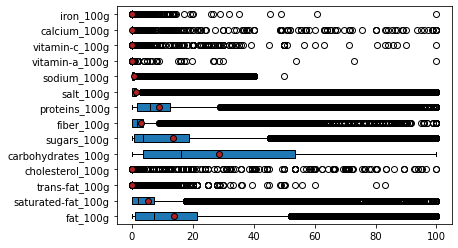

In [21]:
# On recherche les outliers sur les valeurs nutritives
def show_boxplots(cols, showfliers):
    values = []
    for col in cols:
        values.append(data[data[col].notna()][col])
    medianprops = {'color':"black"}
    meanprops = {'marker':'o', 'markeredgecolor':'black',
                'markerfacecolor':'firebrick'}
    plt.boxplot(values, labels=cols, showfliers=showfliers, medianprops=medianprops, 
                vert=False, patch_artist=True, showmeans=True, meanprops=meanprops)
    plt.show()
show_boxplots(cols_100g, True)

Pour rendre nos prédictions plus robustes, on supprime les outliers

In [22]:
taille_avant = data.shape[0]
for col in cols_100g:
    d = data[data[col].notna()][col]
    q1 = d.quantile(0.25) # 1er quartile
    q3 = d.quantile(0.75) # 3e quartile
    min = q1 - 1.5*(q3 - q1) # borne mini
    max = q3 + 1.5*(q3 - q1) # borne maxi
    data.drop(data.loc[lambda data: (data[col] > 0) & (data[col] < min) & (data[col].notna())].index, inplace=True)
    data.drop(data.loc[lambda data: (data[col] > max) & (data[col].notna())].index, inplace=True)
print(taille_avant - data.shape[0], "lignes supprimées")

510433 lignes supprimées


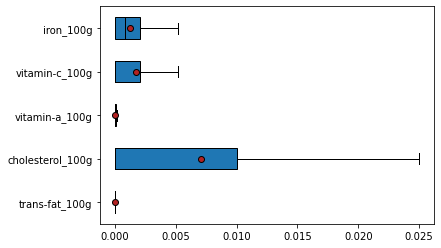

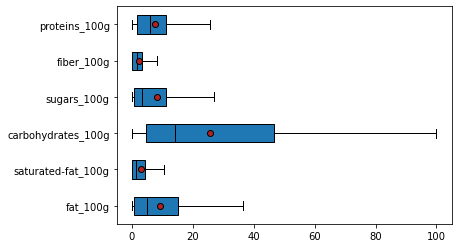

In [23]:
cols_100g_1 = ['trans-fat_100g', 'cholesterol_100g','vitamin-a_100g', 'vitamin-c_100g', 'iron_100g']
cols_100g_2 = ['fat_100g', 'saturated-fat_100g', 'carbohydrates_100g', 'sugars_100g', 'fiber_100g', 'proteins_100g']
show_boxplots(cols_100g_1, False)
show_boxplots(cols_100g_2, False)

In [24]:
# On cherche les doublons par code
print("Nombre de doublons par code :", len(data[data.duplicated(subset="code")]))

Nombre de doublons par code : 103


In [25]:
# Suppression des lignes en doublon par code
data.drop_duplicates(subset="code", inplace=True) # keep="First" TODO

In [26]:
# On cherche les doublons par product_name
print("Nombre de doublons par product_name :", len(data[data.duplicated(subset="product_name")]))
print("Nombre de doublons par product_name & brands :", len(data[data.duplicated(subset=["product_name","brands"])]))
print("Nombre de doublons par product_name & brands & quantity :", len(data[data.duplicated(subset=["product_name","brands","quantity"])]))
# Piste abandonnée => pas évident de dédoublonner avec ce type d'information

Nombre de doublons par product_name : 312428
Nombre de doublons par product_name & brands : 171250
Nombre de doublons par product_name & brands & quantity : 148674


## L'idée d'une application ##

Suite à cette première exploration des données, j'ai pu remarquer que les produits listés détaillaient leur ingrédients (plus ou moins précisemment) et qu'une seule fraction d'entre eux disposaient d'un nutriscore calculé.
Le but de mon application serait de permettre l'affichage d'un nutriscore pour les produits qui n'en disposeraient pas encore.
Sur un téléphone portable, l'utilisateur pourrait ainsi prendre en photo les ingrédients d'un produit, ou rentrerait le code du produit dans l'application, et obtiendrait le nutriscore correspondant.
Dans un second temps, l'application pourrait éventuellement lui conseiller des produits de la même catégorie qui auraient un meilleur nutriscore que celui demandé.

#### Piste à vérifier ####
On sait que les "ingrédients" (dans notre dataset, les colonnes "_100g") déterminent le nutriscore. Nous allons vérifier s'il existe une corrélation entre la catégorie et le nutriscore.

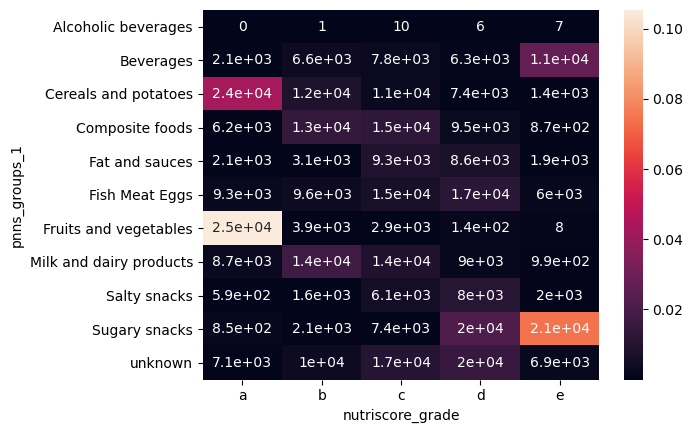

In [149]:
# On vérifie la corrélation entre la catégorie et le nutriscore :
X = "pnns_groups_1"
Y = "nutriscore_grade"
cont = data[[X,Y]].pivot_table(index=X,columns=Y,aggfunc=len,margins=True,margins_name="Total")
tx = cont.loc[:,["Total"]]
ty = cont.loc[["Total"],:]
n = len(data)
indep = tx.dot(ty) / n

c = cont.fillna(0) # On remplace les valeurs nulles par 0
measure = (c-indep)**2/indep
xi_n = measure.sum().sum()
table = measure/xi_n
sns.heatmap(table.iloc[:-1,:-1],annot=c.iloc[:-1,:-1])
plt.rcParams['figure.figsize']=(25,25)
plt.show()
plt.rcdefaults()

Cette analyse nous permet de constater qu'il est préférable de calculer les données manquantes au sein d'une même catégorie.

In [36]:
# On vérifie les valeurs manquantes sur les ingrédients :
composants = data[cols_100g]
percent_missing = composants.isnull().sum() * 100 / len(composants)
missing_values = pd.DataFrame({'pourcentage_manquant': percent_missing})
missing_values.sort_values('pourcentage_manquant', inplace=True)
missing_values

,pourcentage_manquant
proteins_100g,0.537015
carbohydrates_100g,0.629051
fat_100g,0.659868
sugars_100g,1.670817
saturated-fat_100g,3.511952
salt_100g,7.139622
sodium_100g,7.139725
fiber_100g,71.203873
calcium_100g,86.495411
cholesterol_100g,86.967587


Nous allons donc procéder de 2 manières différentes pour le remplissage des valeurs manquantes :
    - la médiane de la catégorie pour les colonnes dont le pourcentage manquant est > 70%
    - la valeur estimée par un modèle KNN pour les données les mieux renseignées

In [37]:
cols_100g_mediane = missing_values[missing_values['pourcentage_manquant'] > 70].index.values
cols_100g_knn = missing_values[missing_values['pourcentage_manquant'] < 70].index.values
print("cols_100g_mediane :", cols_100g_mediane)
print("cols_100g_knn :", cols_100g_knn)

cols_100g_mediane : ['fiber_100g' 'calcium_100g' 'cholesterol_100g' 'iron_100g'
 'trans-fat_100g' 'vitamin-c_100g' 'vitamin-a_100g']
cols_100g_knn : ['proteins_100g' 'carbohydrates_100g' 'fat_100g' 'sugars_100g'
 'saturated-fat_100g' 'salt_100g' 'sodium_100g']


In [38]:
# On replace la valeur "unknown" dans les catégories
pnns_groups_1.append('unknown')

In [90]:
# Sauvegarde avant de remplacer les valeurs manquantes
# data.to_csv("en.openfoodfacts.org.products.clean05.csv", index=False)

# Rechargement des valeurs
#data = pd.read_csv("en.openfoodfacts.org.products.clean05.csv")

In [97]:
# Remplacement des valeurs manquantes par la médiane, par catégorie
import numpy as np
for col in cols_100g_mediane:
    for pnns_group in pnns_groups_1:
        valeurs = data[data["pnns_groups_1"] == pnns_group][col]
        mediane = valeurs.median()
        data.loc[valeurs[valeurs.isnull()].index, [col]] = mediane

mediane de  fiber_100g : 0.0
avant: 1861      NaN
6435      0.4
6447      0.8
10260     0.0
13851     NaN
         ... 
951723    NaN
955612    NaN
955646    NaN
960826    NaN
966306    0.0
Name: fiber_100g, Length: 1624, dtype: float64
apres: 1861      0.0
6435      0.4
6447      0.8
10260     0.0
13851     0.0
         ... 
951723    0.0
955612    0.0
955646    0.0
960826    0.0
966306    0.0
Name: fiber_100g, Length: 1624, dtype: float64
mediane de  fiber_100g : 0.0
avant: 55        NaN
130       NaN
141       0.0
143       NaN
146       NaN
         ... 
966932    0.0
966934    0.4
966975    NaN
966984    NaN
966987    NaN
Name: fiber_100g, Length: 45249, dtype: float64
apres: 55        0.0
130       0.0
141       0.0
143       0.0
146       0.0
         ... 
966932    0.0
966934    0.4
966975    0.0
966984    0.0
966987    0.0
Name: fiber_100g, Length: 45249, dtype: float64
mediane de  fiber_100g : 3.5
avant: 33        NaN
35        1.6
140       NaN
158       2.4
181       NaN
  

Name: calcium_100g, Length: 34712, dtype: float64
mediane de  calcium_100g : 0.12
avant: 125      NaN
231      NaN
451      NaN
765      NaN
782      NaN
          ..
966884   NaN
966897   NaN
966907   NaN
966963   NaN
967003   NaN
Name: calcium_100g, Length: 48905, dtype: float64
apres: 125       0.12
231       0.12
451       0.12
765       0.12
782       0.12
          ... 
966884    0.12
966897    0.12
966907    0.12
966963    0.12
967003    0.12
Name: calcium_100g, Length: 48905, dtype: float64
mediane de  calcium_100g : 0.071
avant: 48       NaN
138      NaN
232      NaN
280      NaN
442      NaN
          ..
966402   NaN
966471   NaN
966667   NaN
966730   NaN
966863   NaN
Name: calcium_100g, Length: 19031, dtype: float64
apres: 48        0.071
138       0.071
232       0.071
280       0.071
442       0.071
          ...  
966402    0.071
966471    0.071
966667    0.071
966730    0.071
966863    0.071
Name: calcium_100g, Length: 19031, dtype: float64
mediane de  calcium_100g : 0.0

apres: 33        0.00252
35        0.00252
140       0.00252
158       0.00424
181       0.00252
           ...   
966936    0.00252
966941    0.00252
966972    0.00252
966994    0.00252
967005    0.00252
Name: iron_100g, Length: 60684, dtype: float64
mediane de  iron_100g : 0.00085
avant: 6        NaN
19       NaN
39       NaN
45       NaN
114      NaN
          ..
966795   NaN
966852   NaN
966885   NaN
966976   NaN
967000   NaN
Name: iron_100g, Length: 45515, dtype: float64
apres: 6         0.00085
19        0.00085
39        0.00085
45        0.00085
114       0.00085
           ...   
966795    0.00085
966852    0.00085
966885    0.00085
966976    0.00085
967000    0.00085
Name: iron_100g, Length: 45515, dtype: float64
mediane de  iron_100g : 0.0
avant: 139      NaN
200      NaN
202      NaN
285      NaN
287      NaN
          ..
966152   NaN
966153   NaN
966565   NaN
966595   NaN
966657   NaN
Name: iron_100g, Length: 28941, dtype: float64
apres: 139       0.0
200       0.0
202    

apres: 12        0.0
74        0.0
98        0.0
121       0.0
155       0.0
         ... 
966862    0.0
966917    0.0
966931    0.0
966940    0.0
967007    0.0
Name: trans-fat_100g, Length: 56685, dtype: float64
mediane de  trans-fat_100g : 0.0
avant: 0        NaN
1        NaN
2        NaN
3        NaN
4        NaN
          ..
967004   NaN
967006   NaN
967009   NaN
967010   NaN
967011   NaN
Name: trans-fat_100g, Length: 567095, dtype: float64
apres: 0         0.0
1         0.0
2         0.0
3         0.0
4         0.0
         ... 
967004    0.0
967006    0.0
967009    0.0
967010    0.0
967011    0.0
Name: trans-fat_100g, Length: 567095, dtype: float64
mediane de  vitamin-c_100g : 0.0047
avant: 1861        NaN
6435      0.005
6447      0.001
10260       NaN
13851       NaN
          ...  
951723      NaN
955612      NaN
955646      NaN
960826      NaN
966306      NaN
Name: vitamin-c_100g, Length: 1624, dtype: float64
apres: 1861      0.0047
6435      0.0050
6447      0.0010
10260    

Name: vitamin-a_100g, Length: 28941, dtype: float64
mediane de  vitamin-a_100g : 0.0
avant: 32       NaN
37       NaN
214      NaN
234      NaN
236      NaN
          ..
966856   NaN
966869   NaN
966886   NaN
966898   NaN
967008   NaN
Name: vitamin-a_100g, Length: 58571, dtype: float64
apres: 32        0.0
37        0.0
214       0.0
234       0.0
236       0.0
         ... 
966856    0.0
966869    0.0
966886    0.0
966898    0.0
967008    0.0
Name: vitamin-a_100g, Length: 58571, dtype: float64
mediane de  vitamin-a_100g : 3.69e-05
avant: 16       NaN
133      NaN
323      NaN
351      NaN
376      NaN
          ..
966628   NaN
966879   NaN
966908   NaN
966986   NaN
966988   NaN
Name: vitamin-a_100g, Length: 34712, dtype: float64
apres: 16        0.000037
133       0.000037
323       0.000037
351       0.000037
376       0.000037
            ...   
966628    0.000037
966879    0.000037
966908    0.000037
966986    0.000037
966988    0.000037
Name: vitamin-a_100g, Length: 34712, dtype: 

In [98]:
composants = data[cols_100g]
percent_missing = composants.isnull().sum() * 100 / len(composants)
missing_values = pd.DataFrame({'pourcentage_manquant': percent_missing})
missing_values.sort_values('pourcentage_manquant', inplace=True)
missing_values

,pourcentage_manquant
trans-fat_100g,0.000000
cholesterol_100g,0.000000
fiber_100g,0.000000
vitamin-a_100g,0.000000
vitamin-c_100g,0.000000
calcium_100g,0.000000
iron_100g,0.000000
proteins_100g,0.537015
carbohydrates_100g,0.629051
fat_100g,0.659868


In [99]:
# Sauvegarde avant de remplacer les valeurs manquantes
#data.to_csv("en.openfoodfacts.org.products.clean06.csv", index=False)

# Rechargement des valeurs
#data = pd.read_csv("en.openfoodfacts.org.products.clean06.csv")

In [116]:
# Premier essai de remplacement des valeurs manquantes restantes via le KNNImputer de sklearn
from sklearn.impute import KNNImputer
import time
tps1 = time.time()
df = data[cols_100g_knn]
imputer = KNNImputer(n_neighbors=3) # ici le nombre de voisins (3) est choisi arbitrairement
imputed = imputer.fit_transform(df) # sur la totalité du jeu de données, ça prend 3.5 heures sur mon pc !
tps2 = time.time()
print(tps2 - tps1, "secondes")

12640.118777513504 secondes


In [117]:
df_imputed = pd.DataFrame(imputed, columns=df.columns)
df_imputed

,proteins_100g,carbohydrates_100g,fat_100g,sugars_100g,saturated-fat_100g,salt_100g,sodium_100g
0,7.8,70.100000,7.0,15.0,3.08,1.40,0.560
1,15.3,11.236246,1.9,9.0,1.00,1.10,0.440
2,15.7,2.600000,15.1,1.0,6.10,2.10,0.840
3,0.2,4.800000,0.0,0.4,0.00,2.04,0.816
4,2.0,10.000000,3.0,3.0,1.00,1.15,0.460
...,...,...,...,...,...,...,...
967007,2.6,35.000000,7.6,24.0,4.80,0.28,0.112
967008,21.5,0.000000,5.0,0.0,2.30,0.18,0.072
967009,1.0,2.000000,12.0,1.0,1.00,1.00,0.400
967010,1.6,2.400000,0.3,0.6,0.00,0.64,0.256


In [119]:
# On a choisi K de façon arbitraire, on va chercher à le fixer à différentes valeurs pour choisir l'optimum
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

rmse = lambda y, yhat: np.sqrt(mean_squared_error(y, yhat))

def optimize_k(df, target):
    errors = []
    # on cherche notre valeur optimale entre 1 et 19 (uniquement les nombres impairs)
    for k in range(1, 20, 2):
        imputer = KNNImputer(n_neighbors=k)
        imputed = imputer.fit_transform(df)
        df_imputed = pd.DataFrame(imputed, columns=cols_100g_knn)
        
        X = df_imputed.drop(target, axis=1)
        y = df_imputed[target]
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

        model = RandomForestRegressor()
        model.fit(X_train, y_train)
        preds = model.predict(X_test)
        error = rmse(y_test, preds)
        errors.append({'K': k, 'RMSE': error})
        
    return errors

# Pour valider le taux d'erreur, on utilise une seule colonne : on va donc cycler sur les 7 différentes colonnes
import time
tps1 = time.time()
tab_k_errors = []
for col in cols_100g_knn:
    # Par contre pour des soucis de performances, on n'utilise qu'un subset de nos données
    # Sur un sample de 100.000 lignes, le fit_transform prend "seulement" 151 sec. sur mon pc
    k_errors = optimize_k(data[cols_100g_knn].sample(100000), col)
    tab_k_errors.append(k_errors)
    print("(", time.time() - tps1, "s) Pour la colonne", col, "on obtient :\n", k_errors, "\n")
tps2 = time.time()
print("Temps de traitement total :", tps2 - tps1, "secondes")    

( 1737.3507361412048 s) Pour la colonne proteins_100g on obtient :
 [{'K': 1, 'RMSE': 3.590533936292947}, {'K': 3, 'RMSE': 3.603608982428957}, {'K': 5, 'RMSE': 3.6037217024791897}, {'K': 7, 'RMSE': 3.6009757104472015}, {'K': 9, 'RMSE': 3.6021195898033094}, {'K': 11, 'RMSE': 3.600010584936668}, {'K': 13, 'RMSE': 3.601856921242417}, {'K': 15, 'RMSE': 3.5996861886051943}, {'K': 17, 'RMSE': 3.5833971183993256}, {'K': 19, 'RMSE': 3.5893340456456335}] 

( 3358.7845644950867 s) Pour la colonne carbohydrates_100g on obtient :
 [{'K': 1, 'RMSE': 13.725833351051891}, {'K': 3, 'RMSE': 13.691998907301981}, {'K': 5, 'RMSE': 13.705923912408814}, {'K': 7, 'RMSE': 13.74853505418045}, {'K': 9, 'RMSE': 13.793743770791608}, {'K': 11, 'RMSE': 13.731481446873248}, {'K': 13, 'RMSE': 13.692444691832472}, {'K': 15, 'RMSE': 13.644702753341235}, {'K': 17, 'RMSE': 13.658588552126107}, {'K': 19, 'RMSE': 13.649068667371882}] 

( 4954.8303825855255 s) Pour la colonne fat_100g on obtient :
 [{'K': 1, 'RMSE': 4.70239

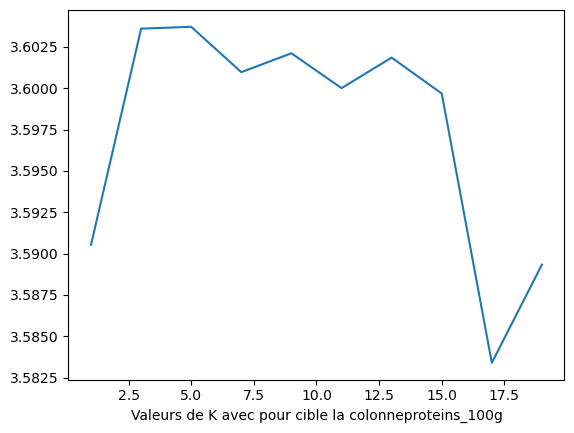

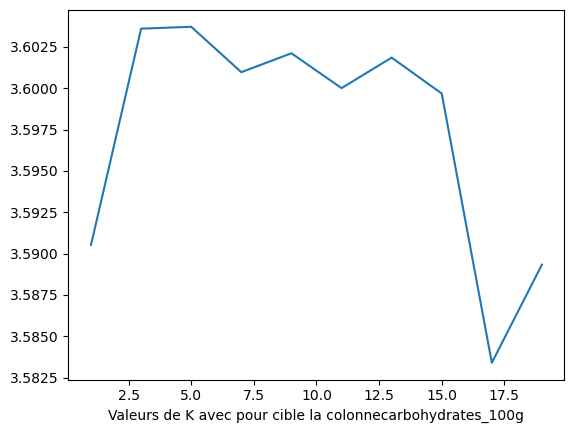

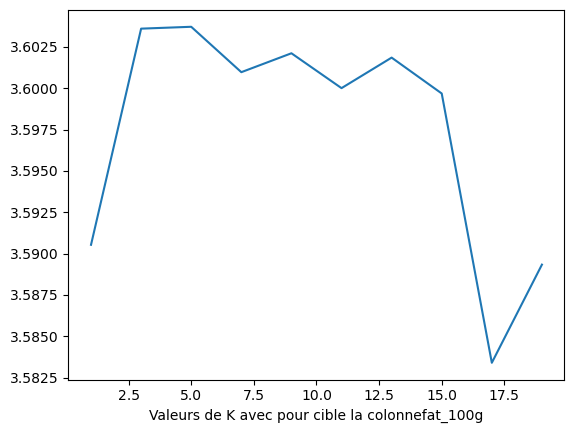

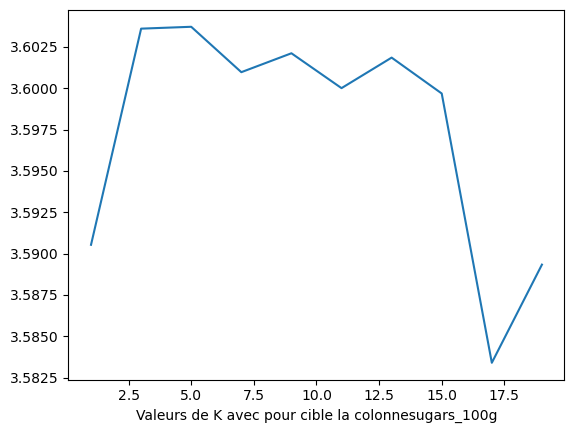

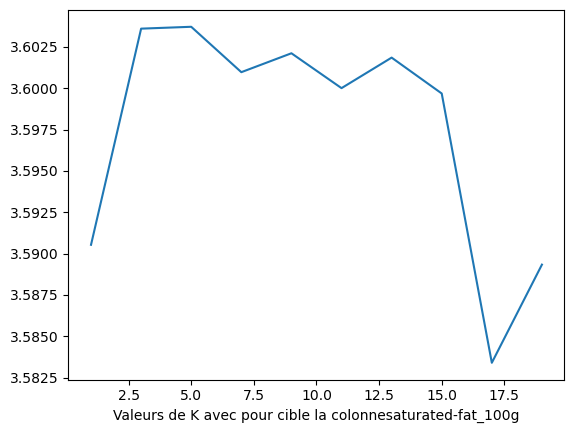

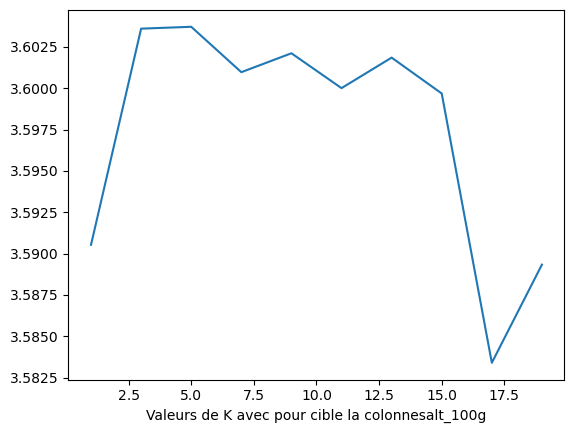

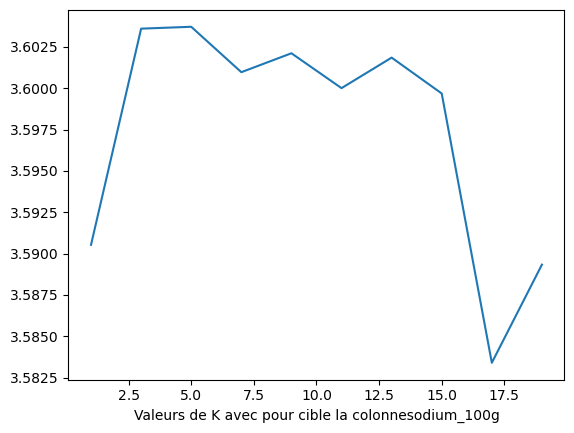

In [147]:
# Pour plus de facilité, on va visualiser ces résultats
i = 0
for k_errors in tab_k_errors:
    x = []
    y = []
    for value in test:
        x.append(value['K'])
        y.append(value['RMSE'])
    #import matplotlib.ticker as ticker
    #plt.gca().xaxis.set_major_formatter(ticker.FormatStrFormatter('%d'))
    plt.plot(x, y)
    plt.xlabel("Valeurs de K avec pour cible la colonne " + cols_100g_knn.item(i))
    plt.show()
    i += 1


In [148]:
# On a pu déterminer que l'erreur, pour toutes les colonnes, était moindre pour K=17
# On relance le remplacement des valeurs manquantes restantes via le KNNImputer avec K=17
from sklearn.impute import KNNImputer
import time
tps1 = time.time()
df = data[cols_100g_knn]
imputer = KNNImputer(n_neighbors=17)
imputed = imputer.fit_transform(df)
tps2 = time.time()
print(tps2 - tps1, "secondes")

13380.907838821411 secondes


In [150]:
df_imputed = pd.DataFrame(imputed, columns=df.columns)
df_imputed

,proteins_100g,carbohydrates_100g,fat_100g,sugars_100g,saturated-fat_100g,salt_100g,sodium_100g
0,7.8,70.100000,7.0,15.000000,3.08,1.40,0.560
1,15.3,18.026396,1.9,5.762941,1.00,1.10,0.440
2,15.7,2.600000,15.1,1.000000,6.10,2.10,0.840
3,0.2,4.800000,0.0,0.400000,0.00,2.04,0.816
4,2.0,10.000000,3.0,3.000000,1.00,1.15,0.460
...,...,...,...,...,...,...,...
967007,2.6,35.000000,7.6,24.000000,4.80,0.28,0.112
967008,21.5,0.000000,5.0,0.000000,2.30,0.18,0.072
967009,1.0,2.000000,12.0,1.000000,1.00,1.00,0.400
967010,1.6,2.400000,0.3,0.600000,0.00,0.64,0.256


In [151]:
# Sauvegarde avant de remplacer les valeurs manquantes
#data.to_csv("en.openfoodfacts.org.products.clean07.csv", index=False)
#df_imputed.to_csv("en.openfoodfacts.org.products.df_imputed.csv", index=False)

# Rechargement des valeurs
#data = pd.read_csv("en.openfoodfacts.org.products.clean07.csv")
#df_imputed = pd.read_csv("en.openfoodfacts.org.products.df_imputed.csv")

In [154]:
# On remet en place les colonnes avec les valeurs complétées par nos KNNs :
for col in df_imputed.columns:
    data[col] = df_imputed[col]

In [155]:
# Et enfin on vérifie que les colonnes n'ont plus de valeurs vides :
composants = data[cols_100g]
percent_missing = composants.isnull().sum() * 100 / len(composants)
missing_values = pd.DataFrame({'pourcentage_manquant': percent_missing})
missing_values.sort_values('pourcentage_manquant', inplace=True)
missing_values

,pourcentage_manquant
fat_100g,0.0
saturated-fat_100g,0.0
trans-fat_100g,0.0
cholesterol_100g,0.0
carbohydrates_100g,0.0
sugars_100g,0.0
fiber_100g,0.0
proteins_100g,0.0
salt_100g,0.0
sodium_100g,0.0


In [156]:
# Sauvegarde finale avec les valeurs manquantes complétées
data.to_csv("en.openfoodfacts.org.products.completed.csv", index=False)